**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 2 - Principal Component Analysis**</font>

# Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 100

# 2D PCA - Implementation and Theory

## Empirical Search for the Direction of Maximum Variance

Simulate bivariate normal data

In [3]:
np.random.seed(5032024) # fix random seed for reproducible results
mu = np.array([1, 2]) # mean
sig = np.array([[1, 1], # cov matrix
                [1, 4]])
n = 100 # number of observations
X = np.random.multivariate_normal(mu, sig, n) # sample from multivariate normal N(mu,sig)
mean_X = X.mean(axis=0)

In [4]:
mean_X

array([1.07391511, 1.96455451])

Plot the data and the sample mean

Text(0.5, 1.0, 'Bivariate Normal Data')

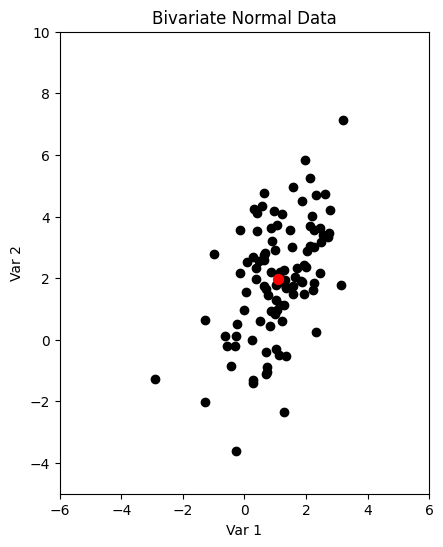

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color='black', marker='o') # plot the data
ax.scatter(mean_X[0], mean_X[1], color='red', s=50) # add a red point with the sample mean
ax.set_xlabel('Var 1')
ax.set_ylabel('Var 2')
ax.set_xlim(-6, 6)
ax.set_ylim(-5, 10)
ax.set_aspect('equal', adjustable='box')
plt.title('Bivariate Normal Data')

Compute the variance along specific directions

Variance along x-axis: 1.1063041224946633


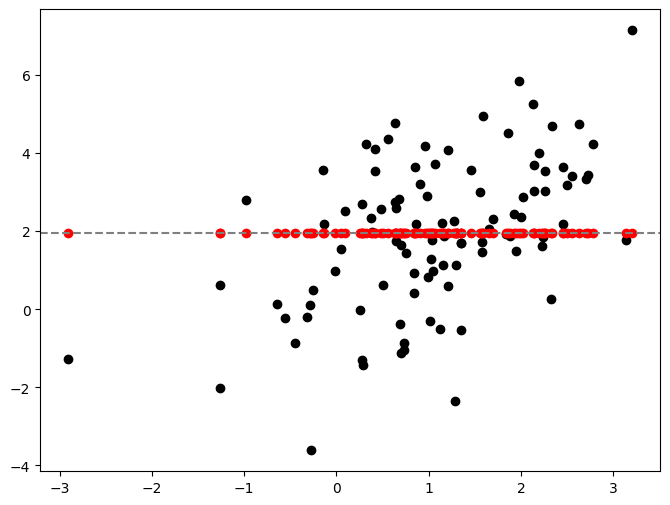

In [ ]:
# Compute and plot variance of the projection of the data along the x-axis
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color='black')
ax.axhline(mean_X[1], color='grey', linestyle='--')
ax.scatter(X[:,0], np.full(n, mean_X[1]), color='red')
var_x = np.var(X[:,0], ddof=1) # ddof=1 computes the sample variance correctly
print('Variance along x-axis:', var_x)

Variance along y-axis: 3.6623604597560124


Text(0.5, 1.0, 'Variance along Coordinate Axes')

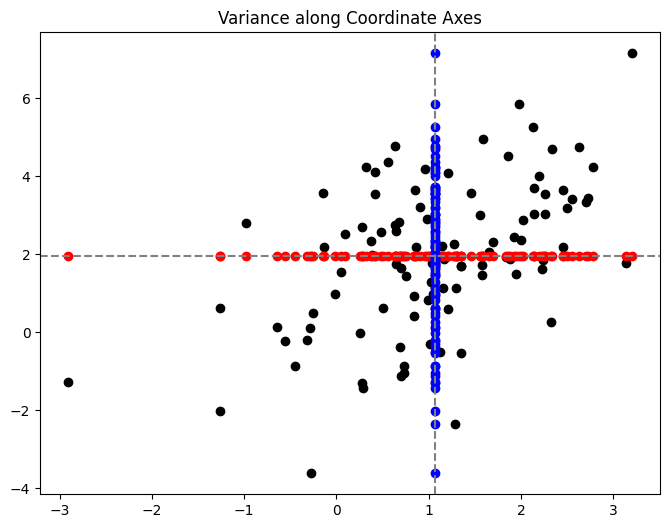

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color='black')
ax.axhline(mean_X[1], color='grey', linestyle='--')
ax.scatter(X[:,0], np.full(n, mean_X[1]), color='red')

ax.axvline(mean_X[0], color='grey', linestyle='--')
ax.scatter(np.full(n, mean_X[0]), X[:,1], color='blue')
var_y = np.var(X[:,1], ddof=1)
print('Variance along y-axis:', var_y)
plt.title('Variance along Coordinate Axes')

Projection along theta = pi/6

Variance along direction (pi/6): 2.6343768188470174


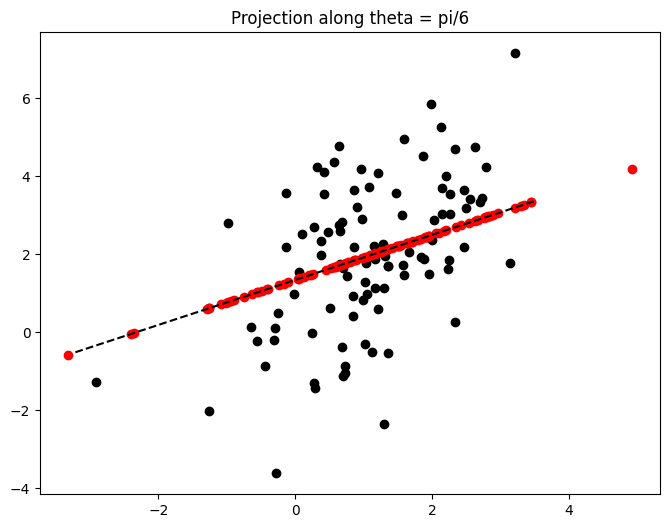

In [ ]:
theta = np.pi / 6
a = np.array([np.cos(theta), np.sin(theta)])
proj30 = (X - mean_X) @ a # matrix multiplication
## TODO
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color='black')
x_line = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
y_line = mean_X[1] - np.tan(theta)*mean_X[0] + np.tan(theta)*x_line
ax.plot(x_line, y_line, linestyle='--', color='black')
ax.scatter(mean_X[0] + np.cos(theta)*proj30, mean_X[1] + np.sin(theta)*proj30, color='red')
var_proj30 = np.var(proj30, ddof=1)
print('Variance along direction (pi/6):', var_proj30)
plt.title('Projection along theta = pi/6')
plt.show()

Compute variance along all directions, find min and max variance

In [8]:
thetas = np.linspace(0, np.pi, 181)
variances = []

for t in thetas:
## TODO
  a = np.array([np.cos(t), np.sin(t)])
  proj = (X - mean_X) @ a # matrix multiplication
  var_proj = np.var(proj, ddof=1)
  variances.append(var_proj)

max_theta_idx = np.argmax(variances)
max_theta = thetas[max_theta_idx]

min_theta_idx = np.argmin(variances)
min_theta = thetas[min_theta_idx]

In [9]:
max_theta / np.pi * 180
#degrees

np.float64(71.0)

In [10]:
min_theta / np.pi * 180

np.float64(161.0)

In [ ]:
max_var

4.023468121296431

In [ ]:
min_var

0.7451964609542457

Plot variance along all directions, highlighting directions with min and max variance

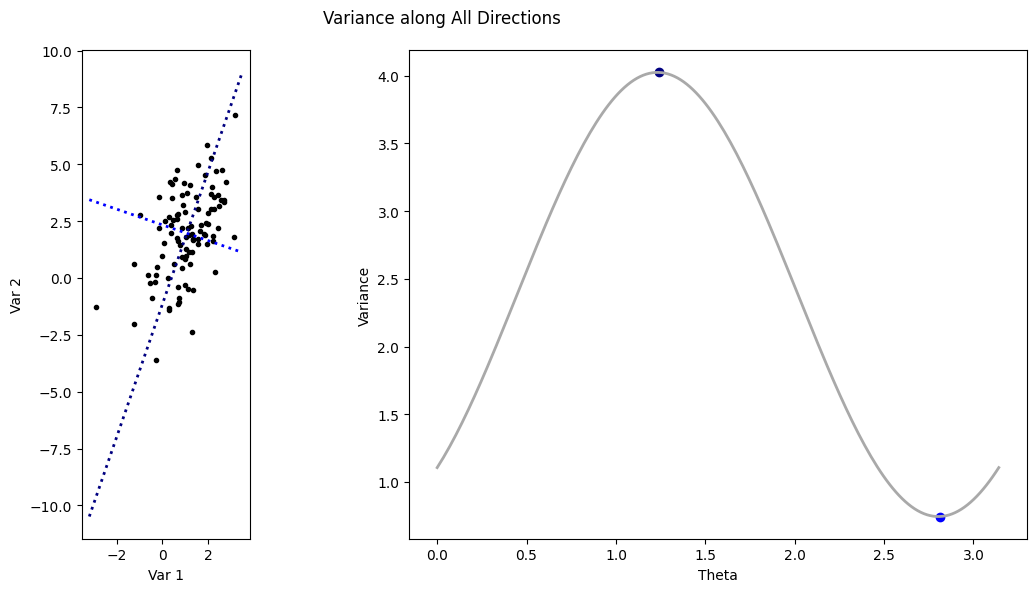

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].scatter(X[:,0], X[:,1], color='black', marker='.')
axs[0].plot(x_line, mean_X[1] - np.tan(max_theta)*mean_X[0] + np.tan(max_theta)*x_line,
            linestyle=':', color='navy', linewidth=2)
axs[0].plot(x_line, mean_X[1] - np.tan(min_theta)*mean_X[0] + np.tan(min_theta)*x_line,
            linestyle=':', color='blue', linewidth=2)
axs[0].set_xlabel('Var 1')
axs[0].set_ylabel('Var 2')
axs[0].set_aspect('equal')

axs[1].plot(thetas, variances, color='darkgrey', linewidth=2)
axs[1].scatter([max_theta], [max_var], color='navy')
axs[1].scatter([min_theta], [min_var], color='blue')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Variance')
plt.suptitle('Variance along All Directions')
plt.tight_layout()
plt.show()

## Confrontation with the theory

In [ ]:
# Compute the sample covariance matrix and its eigen-decomposition
M = mean_X  # sample mean from previous cell
S = np.cov(X, rowvar=False)
eigvals, eigvecs = np.linalg.eig(S)
order = eigvals.argsort()[::-1] #sort in descending order for eigenvalues
eigvals, eigvecs = eigvals[order], eigvecs[:, order]

print("Eigenvalues:", eigvals)
print("Eigenvectors (columns):\n", eigvecs)
print("Empirical max variance:", max_var)
print("Empirical min variance:", min_var)

max_a = np.array([np.cos(max_theta), np.sin(max_theta)])
min_a = np.array([np.cos(min_theta), np.sin(min_theta)])
print("Empirical max direction:", max_a)
print("Empirical min direction:", min_a)

Eigenvalues: [4.02361759 0.74504699]
Eigenvectors (columns):
 [[-0.33194486 -0.94329879]
 [-0.94329879  0.33194486]]
Empirical max variance: 4.023468121296431
Empirical min variance: 0.7451964609542457
Empirical max direction: [0.32556815 0.94551858]
Empirical min direction: [-0.94551858  0.32556815]


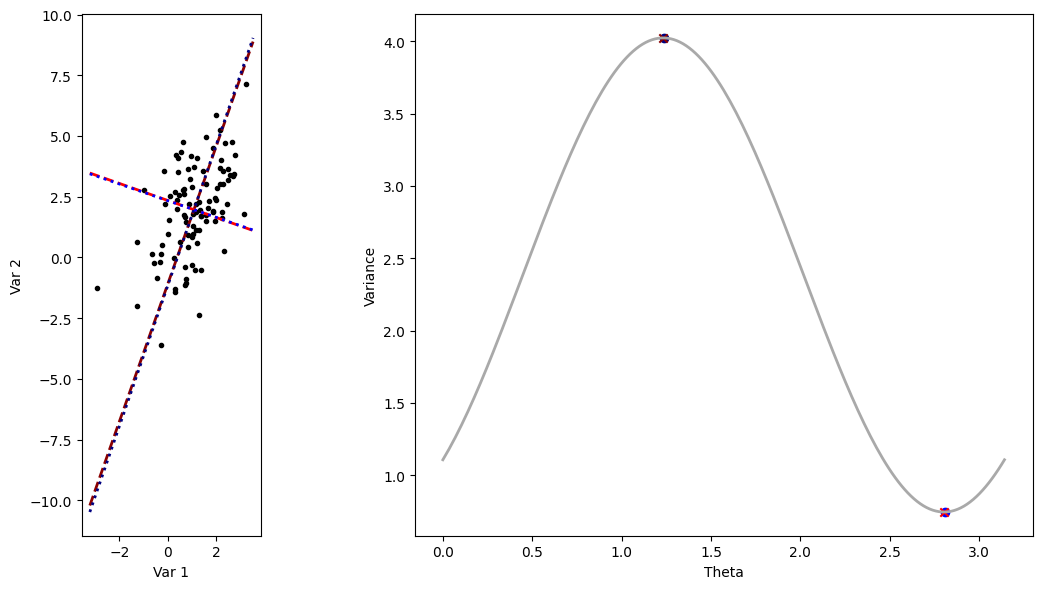

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Left subplot: data and direction lines
axs[0].scatter(X[:,0], X[:,1], color='black', marker='.')
axs[0].set_xlabel('Var 1')
axs[0].set_ylabel('Var 2')
axs[0].set_aspect('equal')

# Plot the eigenvector directions (using slopes computed from eigenvectors)
slope1 = eigvecs[1,0] / eigvecs[0,0]
slope2 = eigvecs[1,1] / eigvecs[0,1]
x_line = np.linspace(axs[0].get_xlim()[0], axs[0].get_xlim()[1], 100)
axs[0].plot(x_line, M[1] - slope1*M[0] + slope1*x_line,
            linestyle='--', color='darkred', linewidth=2)
axs[0].plot(x_line, M[1] - slope2*M[0] + slope2*x_line,
            linestyle='--', color='red', linewidth=2)

# Also plot the empirically found max/min directions for comparison
axs[0].plot(x_line, M[1] - np.tan(max_theta)*M[0] + np.tan(max_theta)*x_line,
            linestyle=':', color='navy', linewidth=2)
axs[0].plot(x_line, M[1] - np.tan(min_theta)*M[0] + np.tan(min_theta)*x_line,
            linestyle=':', color='blue', linewidth=2)

# Right subplot: variance as a function of theta, marking the extrema
axs[1].plot(thetas, variances, color='darkgrey', linewidth=2)

axs[1].scatter([max_theta], [max_var], color='navy', marker='o')
axs[1].scatter([min_theta], [min_var], color='blue', marker='o')

angle1 = np.arctan(eigvecs[1, 0] / eigvecs[0, 0])
angle2 = np.arctan(eigvecs[1, 1] / eigvecs[0, 1]) + np.pi
axs[1].scatter(angle1, max(eigvals), marker='x', color='darkred', label='Max Var')
axs[1].scatter(angle2, min(eigvals), marker='x', color='red', label='Min Var')

axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Variance')

plt.tight_layout()
plt.show()

# 3D PCA Visualization

The next cells simulate 3D data, plot the data and a covariance ellipsoid, and then show how the PCA approximates the data by 0D (a point), 1D (a line) and 2D (a plane) representations.

In [ ]:
# Simulate 3D data
mu3 = np.array([0, 2, 3])
sig3 = np.array([[9, 1, 1],
                 [1, 4, 1],
                 [1, 1, 1]])
nobs = 100
X3 = np.random.multivariate_normal(mu3, sig3, nobs)
M3 = X3.mean(axis=0)
S3 = np.cov(X3, rowvar=False)
print('3D sample mean:', M3)
print('3D sample covariance:\n', S3)

3D sample mean: [0.49563483 2.15064285 3.13808932]
3D sample covariance:
 [[8.96561188 0.68645295 1.16789945]
 [0.68645295 3.29351486 0.80839048]
 [1.16789945 0.80839048 0.90224219]]


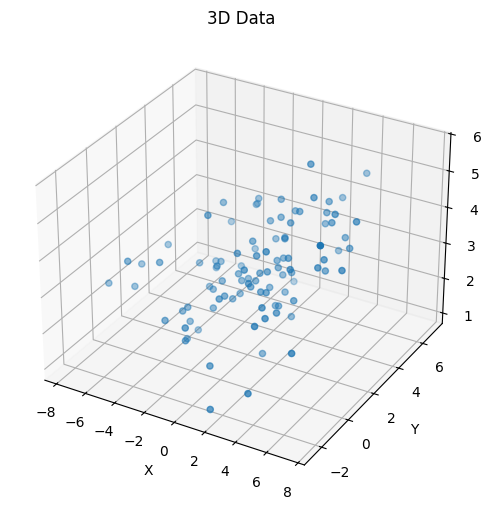

In [ ]:
# 3D plot of data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Data')
plt.show()

In [ ]:
pca3 = PCA()
PC_scores = pca3.fit_transform(X3)
print('3D PCA components:\n', pca3.components_)
print('3D PCA explained variance:', pca3.explained_variance_)

3D PCA components:
 [[ 0.97959616  0.13354028  0.15019439]
 [-0.16653875  0.95769728  0.23469291]
 [-0.1124998  -0.25491746  0.96039621]]
3D PCA explained variance: [9.23825594 3.37224798 0.55086502]


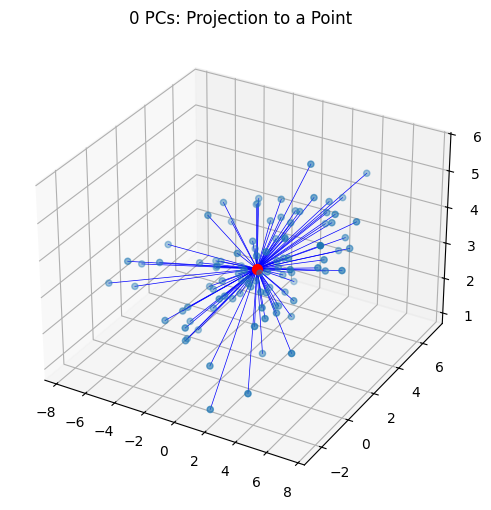

In [ ]:
# 0-dimensional approximation: projection to the mean
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], s=20)
ax.scatter(M3[0], M3[1], M3[2], color='red', s=50)
for i in range(nobs):
    ax.plot([X3[i,0], M3[0]], [X3[i,1], M3[1]], [X3[i,2], M3[2]], color='blue', linewidth=0.5)
ax.set_title('0 PCs: Projection to a Point')
plt.show()

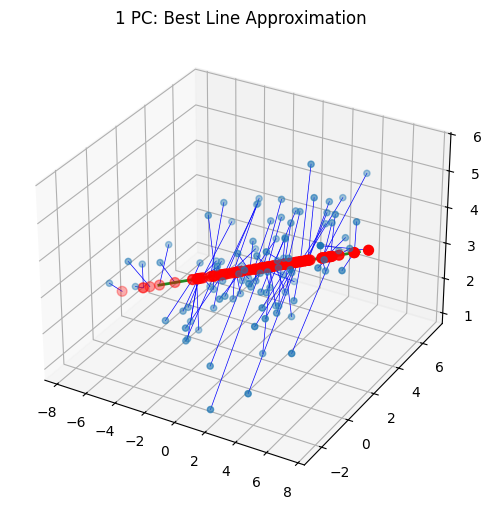

In [ ]:
# 1D approximation: projection on first principal component
explained_std = np.sqrt(pca3.explained_variance_)
PC1 = np.array([M3 + score[0] * pca3.components_[0] for score in PC_scores])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], s=20)
ax.scatter(PC1[:,0], PC1[:,1], PC1[:,2], color='red', s=50)
for i in range(nobs):
    ax.plot([X3[i,0], PC1[i,0]], [X3[i,1], PC1[i,1]], [X3[i,2], PC1[i,2]], color='blue', linewidth=0.5)
line_PC1 = np.array([M3 + 2*explained_std[0]*pca3.components_[0],
                     M3 - 2*explained_std[0]*pca3.components_[0]])
ax.plot(line_PC1[:,0], line_PC1[:,1], line_PC1[:,2], color='forestgreen', linewidth=2)
ax.set_title('1 PC: Best Line Approximation')
plt.show()

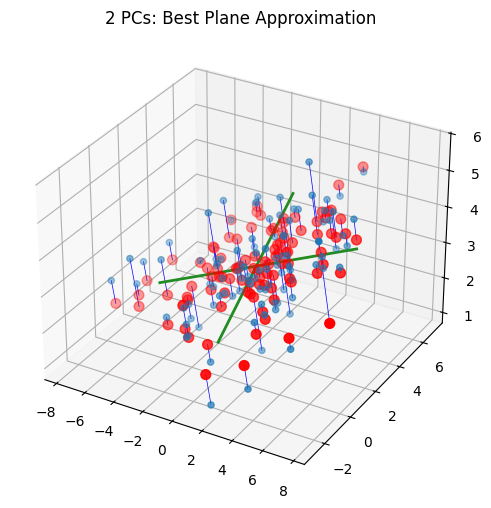

In [ ]:
# 2D approximation: projection on first two principal components
PC12 = np.array([M3 + score[0]*pca3.components_[0] + score[1]*pca3.components_[1] for score in PC_scores])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], s=20)
ax.scatter(PC12[:,0], PC12[:,1], PC12[:,2], color='red', s=50)
for i in range(nobs):
    ax.plot([X3[i,0], PC12[i,0]], [X3[i,1], PC12[i,1]], [X3[i,2], PC12[i,2]], color='blue', linewidth=0.5)
line_PC1 = np.array([M3 + 2*explained_std[0]*pca3.components_[0], M3 - 2*explained_std[0]*pca3.components_[0]])
line_PC2 = np.array([M3 + 2*explained_std[1]*pca3.components_[1], M3 - 2*explained_std[1]*pca3.components_[1]])
ax.plot(line_PC1[:,0], line_PC1[:,1], line_PC1[:,2], color='forestgreen', linewidth=2)
ax.plot(line_PC2[:,0], line_PC2[:,1], line_PC2[:,2], color='forestgreen', linewidth=2)
ax.set_title('2 PCs: Best Plane Approximation')
plt.show()

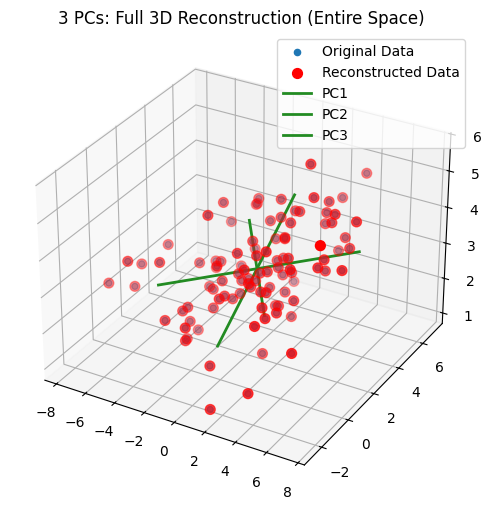

In [ ]:
# ## Space spanned by all PCs -------------------------------------------------------------------
# I, II and III principal components: the best approximation of dimension 3 (the entire space)

# Reconstruct each observation using all three PCs.
# This reconstruction should be (almost) identical to the original data.
PC123 = np.array([
    M3 + score[0]*pca3.components_[0] + score[1]*pca3.components_[1] + score[2]*pca3.components_[2]
    for score in PC_scores
])

# Create a 3D figure for the full reconstruction.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original 3D data points.
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], s=20, label='Original Data')

# Plot the reconstructed data points (should closely overlay the original points).
ax.scatter(PC123[:, 0], PC123[:, 1], PC123[:, 2], color='red', s=50, label='Reconstructed Data')

# Draw blue lines connecting each original point with its reconstruction.
for i in range(nobs):
    ax.plot([X3[i, 0], PC123[i, 0]],
            [X3[i, 1], PC123[i, 1]],
            [X3[i, 2], PC123[i, 2]],
            color='blue', linewidth=0.5)

# For consistency with the 1D and 2D projection codes,
# we plot the principal component directions scaled by 2*standard deviation.
# (Here, we assume that 'explained_std' was computed as:
#     explained_std = np.sqrt(pca3.explained_variance_))
line_PC1 = np.array([M3 + 2 * explained_std[0] * pca3.components_[0],
                     M3 - 2 * explained_std[0] * pca3.components_[0]])
line_PC2 = np.array([M3 + 2 * explained_std[1] * pca3.components_[1],
                     M3 - 2 * explained_std[1] * pca3.components_[1]])
line_PC3 = np.array([M3 + 2 * explained_std[2] * pca3.components_[2],
                     M3 - 2 * explained_std[2] * pca3.components_[2]])

# Plot the principal component directions.
ax.plot(line_PC1[:, 0], line_PC1[:, 1], line_PC1[:, 2],
        color='forestgreen', linewidth=2, label='PC1')
ax.plot(line_PC2[:, 0], line_PC2[:, 1], line_PC2[:, 2],
        color='forestgreen', linewidth=2, label='PC2')
ax.plot(line_PC3[:, 0], line_PC3[:, 1], line_PC3[:, 2],
        color='forestgreen', linewidth=2, label='PC3')

ax.set_title("3 PCs: Full 3D Reconstruction (Entire Space)")
ax.legend()

plt.show()

# PCA on the Tourists Dataset

## Load and visualize dataset

The dataset "tourists.txt" collects the data on the flow of Italian tourism
from outside Lombardy to Milan for the year 2015. Each statistical unit
corresponds to a Region of origin and a month of observation. For each unit,
the tourist flow is quantified through the number of nights spent by clients
in: '5 stars hotels', '4 stars hotels', '3 stars hotels', '2 stars hotels',
'1 star hotels', 'residences', 'B&B' and 'rented flats'.

In [6]:
# Read the tourists dataset
tourists = pd.read_csv('../DatasetsLabs/tourists.txt', sep=' ')
tourists.head()

,Month,Region.of.origin,Hotel.5stars,Hotel.4stars,Hotel.3stars,Hotel.2stars,Hotel.1star,Residences,Bed.Breakfast,Rented.flats
1,Jan,PIEMONTE,255,5733,3878,351,504,1489,41,551
2,Feb,PIEMONTE,277,6613,3816,352,380,1617,31,415
3,Mar,PIEMONTE,272,7278,4518,523,475,1949,42,520
4,Apr,PIEMONTE,181,5311,3550,383,330,1853,42,542
5,May,PIEMONTE,301,5885,3231,396,421,2050,85,561


In [7]:
tourists_data = tourists.iloc[:, 2:]
tourists_label = tourists.iloc[:, :2]
n_tour, p_tour = tourists_data.shape
print('Tourists dataset shape:', tourists_data.shape)
tourists_data.head()
tourists_data.columns

Tourists dataset shape: (240, 8)


Index(['Hotel.5stars', 'Hotel.4stars', 'Hotel.3stars', 'Hotel.2stars',
       'Hotel.1star', 'Residences', 'Bed.Breakfast', 'Rented.flats'],
      dtype='object')

In [8]:
tourists_data.var()

Hotel.5stars     6.612105e+04
Hotel.4stars     3.243746e+07
Hotel.3stars     9.415516e+06
Hotel.2stars     1.482218e+05
Hotel.1star      8.868538e+04
Residences       1.794907e+06
Bed.Breakfast    7.967204e+03
Rented.flats     2.921683e+05
dtype: float64

Come si può notare la varianza è su scale diverse, per questo faccio fatica a comprendere quale componente è meglio e quale no, soprattutto se devo applicare la PCA.
Lo scaling serve proprio a questo, ad uniformare le scale delle varianze, nella prossima cella scalo tutto e mostro come cambiano le cose.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(tourists_data), columns = tourists_data.columns)
X.head()

,Hotel.5stars,Hotel.4stars,Hotel.3stars,Hotel.2stars,Hotel.1star,Residences,Bed.Breakfast,Rented.flats
0,0.209126,0.014004,0.091331,-0.293548,0.521219,0.125027,-0.437469,-0.011826
1,0.294861,0.168838,0.071083,-0.290945,0.103963,0.220767,-0.549736,-0.263959
2,0.275376,0.285843,0.300340,0.154143,0.423635,0.469094,-0.426242,-0.069298
3,-0.079256,-0.060246,-0.015786,-0.210257,-0.064285,0.397289,-0.426242,-0.028512
4,0.388390,0.040748,-0.119964,-0.176420,0.241927,0.544639,0.056508,0.006713


Infatti ora è molto più facile vedere quali variabili sono importanti

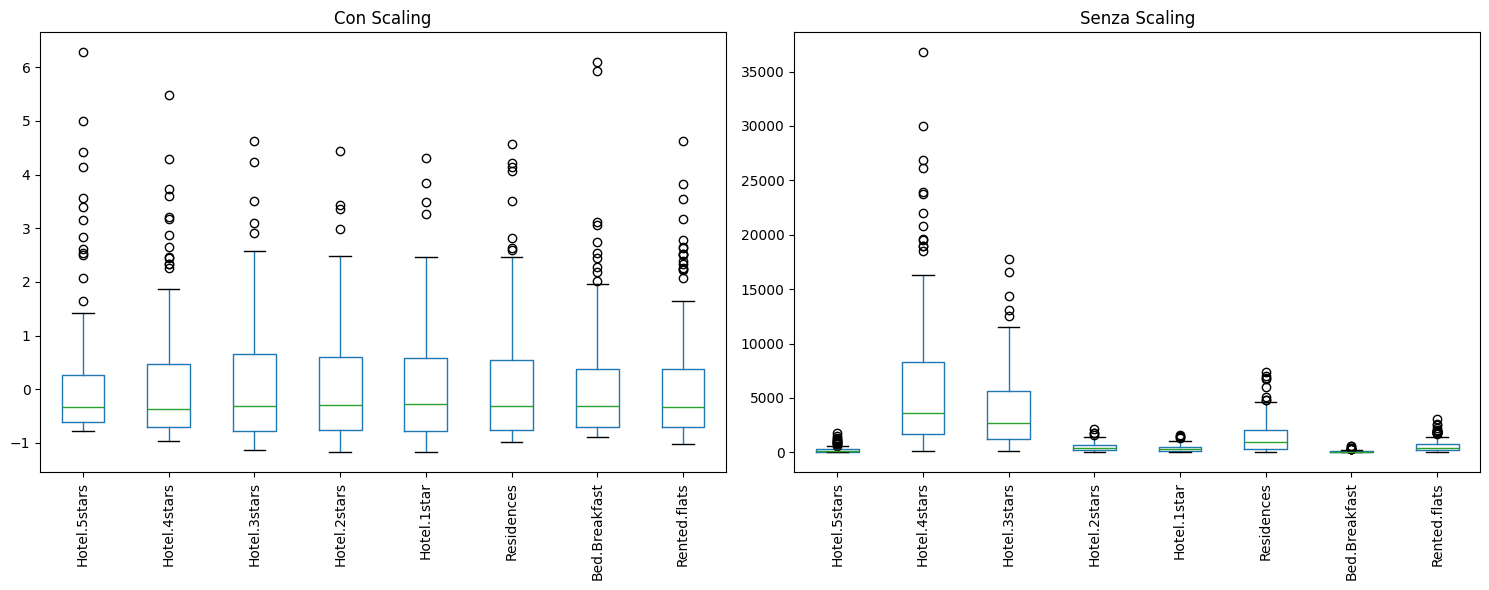

In [10]:
# Crea una figura con 2 subplot affiancati
plt.figure(figsize=(15, 6))

# Primo boxplot (sinistra)
plt.subplot(1, 2, 1)
X.boxplot(rot=90, grid=False)
plt.title('Con Scaling')

# Secondo boxplot (destra)
plt.subplot(1, 2, 2)
# Sostituisci 'altro_dataset' con i tuoi dati
tourists_data.boxplot(rot=90, grid=False)
plt.title('Senza Scaling')

plt.tight_layout()  # Aggiusta automaticamente gli spazi
plt.show()

Boxplot of original data

## PCA on original data

In [11]:
pca_tourists = PCA()
tourists_scores = pca_tourists.fit_transform(tourists_data)
print('Tourists PCA explained variance ratio:\n', pca_tourists.explained_variance_ratio_)

Tourists PCA explained variance ratio:
 [9.80435551e-01 1.54348931e-02 3.01060627e-03 5.99554411e-04
 3.13904868e-04 9.33619028e-05 8.57873032e-05 2.63408204e-05]


Guarda se applico la pca a i dati originali come si distribuisce la varianza. è giusto nei principal components che la variance si distribuisca in modo crescente, ma in questo caso è data da unità di misura sballate

<Axes: >

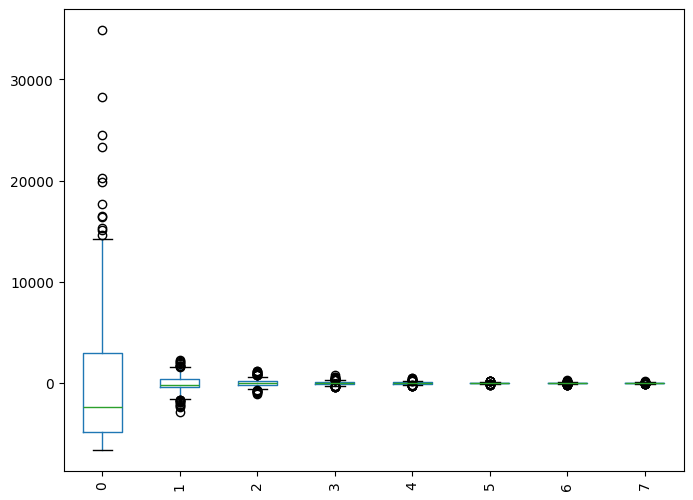

In [12]:
tourists_scores = pd.DataFrame(tourists_scores)
tourists_scores.boxplot(rot=90, grid=False)

<Axes: >

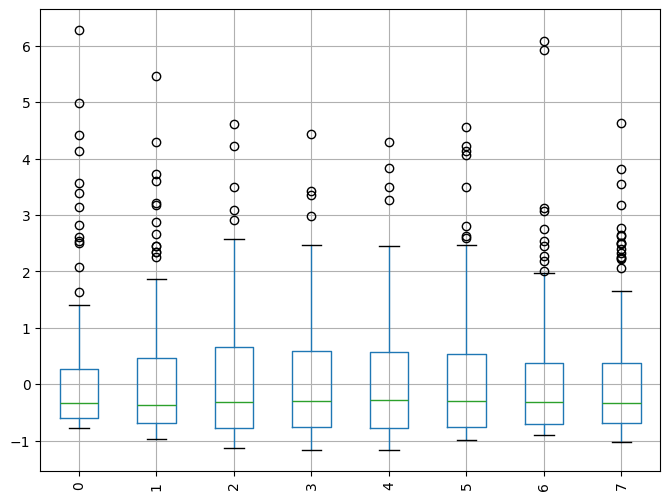

In [13]:
scaler = StandardScaler()
tourists_data_scaled = scaler.fit_transform(tourists_data)
tourists_data_scaled = pd.DataFrame(tourists_data_scaled)
tourists_data_scaled.boxplot(rot = 90)

In [14]:
variance_explained = [pca_tourists.explained_variance_ / np.sum(pca_tourists.explained_variance_)*100]
variance_explained

[array([9.80435551e+01, 1.54348931e+00, 3.01060627e-01, 5.99554411e-02,
        3.13904868e-02, 9.33619028e-03, 8.57873032e-03, 2.63408204e-03])]

Non ha senso che il primo pc abbia 98% di variance da solo

In [15]:
pca = PCA()
X = pca.fit_transform(X)
pca.explained_variance_
variance_explained_scaled = [pca.explained_variance_ / np.sum(pca.explained_variance_)*100]
variance_explained_scaled

[array([89.6114837 ,  5.05078934,  2.7060312 ,  1.15780767,  0.6211281 ,
         0.45792556,  0.25689113,  0.13794332])]

In [20]:
pc_sd = np.sqrt(pca_tourists.explained_variance_)
print("Standard deviation of the components:")
print(pc_sd)

# Cumulative proportion of explained variance:
cumulative_explained_variance = np.cumsum(pca_tourists.explained_variance_ratio_)
print("Cumulative proportion of explained variance:")
print(cumulative_explained_variance)

Standard deviation of the components:
[6586.75180678  826.44429714  364.99654582  162.88311834  117.85847007
   64.27567128   61.61313141   34.14101456]
Cumulative proportion of explained variance:
[0.98043555 0.99587044 0.99888105 0.99948061 0.99979451 0.99988787
 0.99997366 1.        ]


Loadings

In [17]:
load_tour = pca_tourists.components_.T
load_tour

array([[ 0.036988  , -0.06875905,  0.03032049, -0.01538322, -0.09843182,
         0.1792697 ,  0.87877522, -0.42270057],
       [ 0.86250762, -0.48404327, -0.12963676,  0.00331453,  0.03025384,
         0.0104852 , -0.06070552,  0.01598857],
       [ 0.45374825,  0.83652698, -0.17078613, -0.151654  , -0.20265148,
        -0.01267825,  0.03057386,  0.00227378],
       [ 0.0525281 ,  0.14868959, -0.1461287 ,  0.15710032,  0.79181454,
        -0.5148528 ,  0.15814922, -0.10974173],
       [ 0.03921975,  0.14477781, -0.04127983,  0.2494434 ,  0.45701223,
         0.81423507, -0.16034057, -0.12659831],
       [ 0.19594019,  0.10300007,  0.95393089, -0.12569757,  0.15539773,
        -0.02558117, -0.00302853,  0.0200594 ],
       [ 0.01153809,  0.01380745, -0.02285702,  0.08655516,  0.10166414,
         0.13233387,  0.41520552,  0.88961706],
       [ 0.07747214,  0.08560395,  0.13979581,  0.93089164, -0.27930944,
        -0.14619468, -0.00302077, -0.03423665]])

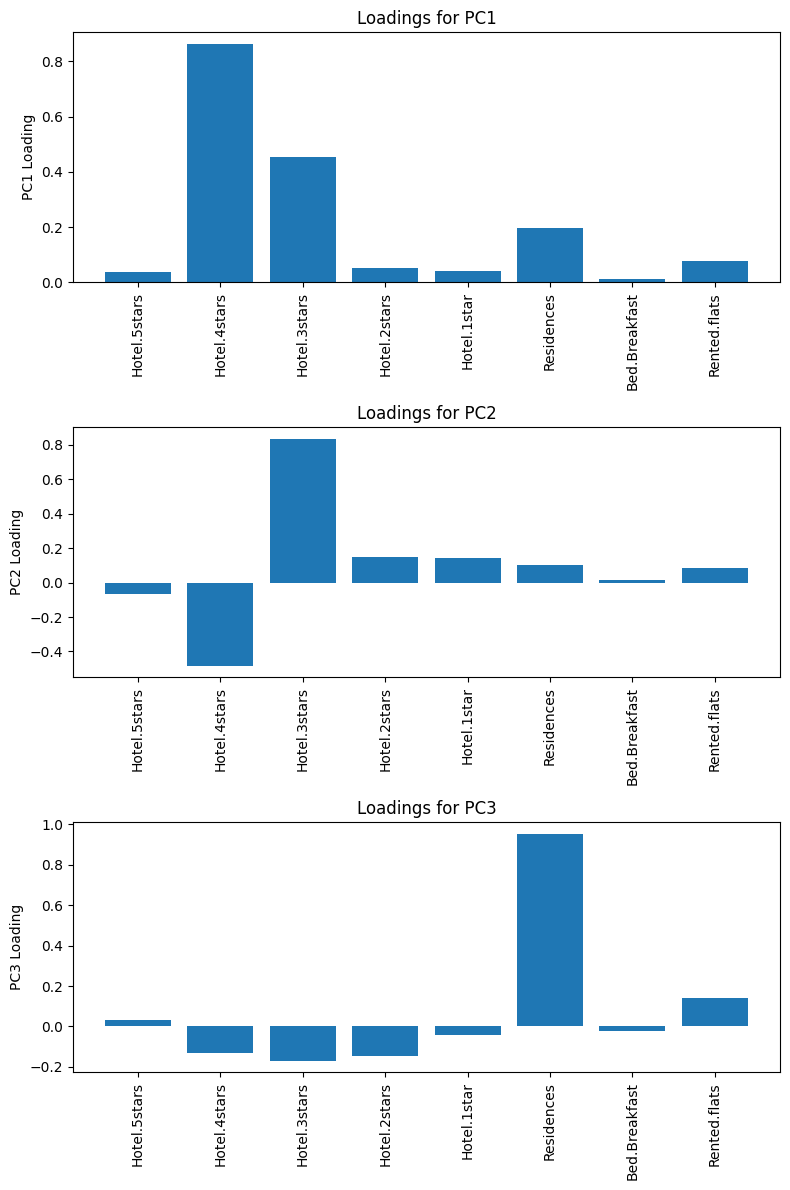

In [21]:
##TODO Barplots of loadings for the first three PCs, i loadings sono i pesi che ogni feature ha nella costruzione del PCi
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for i, ax in enumerate(axes):
    ax.bar(tourists_data.columns, load_tour[:, i])
    ax.set_xticklabels(tourists_data.columns, rotation=90)
    ax.set_ylabel(f"PC{i+1} Loading")
    ax.set_title(f"Loadings for PC{i+1}")

plt.tight_layout()
plt.show()


Interpretation of the loadings:

First PC: weighted average of the number of nights in 3,4 stars hotel and residences

Second PC: contrast between the number of nights in 3 and 4 stars hotel

Third PC: residences

The loadings reflect the previous observation: the first 3 PCs are
driven by the variables displaying the highest variability

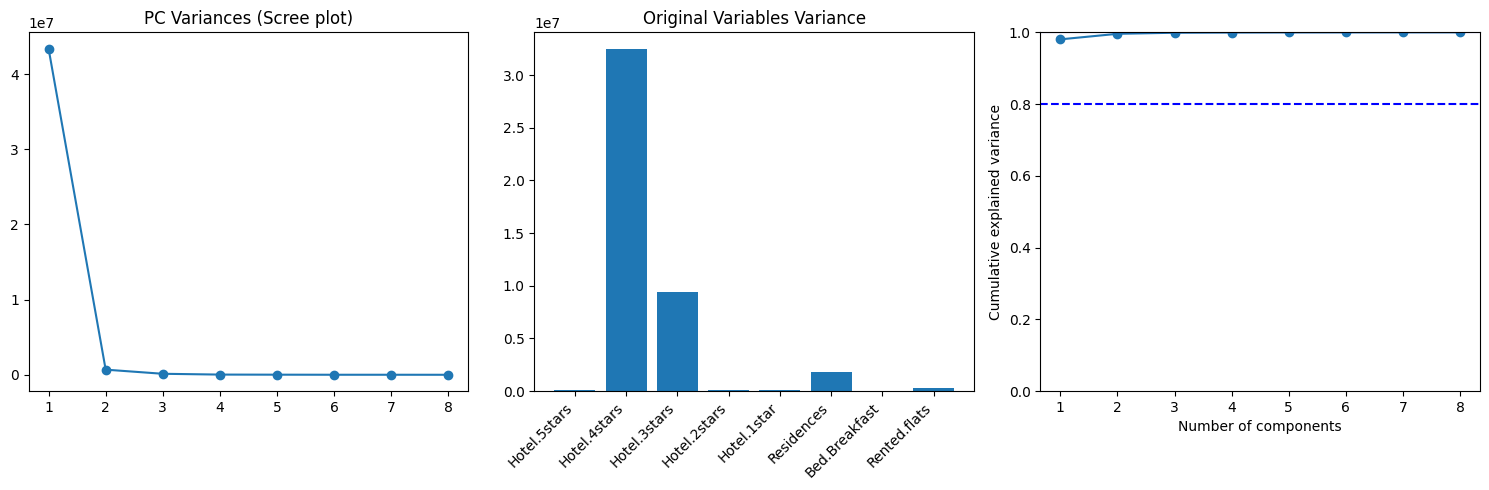

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(np.arange(1, p_tour+1), pca_tourists.explained_variance_, marker='o')
axs[0].set_title('PC Variances (Scree plot)')
orig_variances = tourists_data.var(ddof=1)
axs[1].bar(tourists_data.columns, orig_variances)
axs[1].tick_params(axis='x', rotation=45)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_title('Original Variables Variance')
cum_explained = np.cumsum(pca_tourists.explained_variance_ratio_)
axs[2].plot(np.arange(1, p_tour+1), cum_explained, marker='o')
axs[2].axhline(1, color='blue')
axs[2].axhline(0.8, color='blue', linestyle='--')
axs[2].set_xlabel('Number of components')
axs[2].set_ylabel('Cumulative explained variance')
axs[2].set_ylim(0,1)
plt.tight_layout()
plt.show()

The first PC explains more than 98% of the total variability.

This is due to the masking effect of those 3 variables over the others

## PCA on standardized data

Standardize data

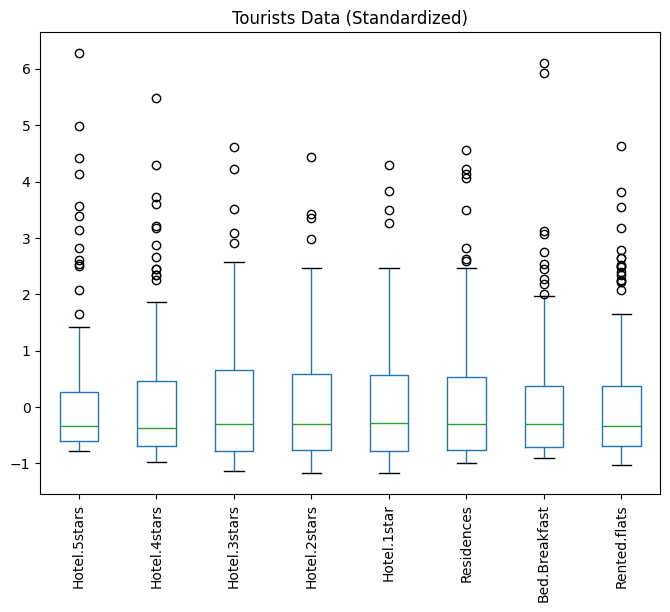

In [23]:
scaler = StandardScaler()
tourists_std = scaler.fit_transform(tourists_data)
tourists_std_df = pd.DataFrame(tourists_std, columns=tourists_data.columns)
plt.figure()
tourists_std_df.boxplot(rot=90, grid=False)
plt.title('Tourists Data (Standardized)')
plt.show()

PCA on standardized data

In [24]:
# TODO
pca_tourists_std = PCA()
tourists_scores_std = pca_tourists_std.fit_transform(tourists_std_df)
print('Standardized Tourists PCA explained variance ratio:\n', pca_tourists_std.explained_variance_ratio_)
load_tour_std = pca_tourists_std.components_.T

Standardized Tourists PCA explained variance ratio:
 [0.89611484 0.05050789 0.02706031 0.01157808 0.00621128 0.00457926
 0.00256891 0.00137943]


In [25]:
# Estrai tutte le caratteristiche
components = pca_tourists_std.components_ #pesi o loadings di ogni componente per ogni pc
loadings = pca_tourists_std.components_.T
explained_var = pca_tourists_std.explained_variance_
explained_var_ratio = pca_tourists_std.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)
components

array([[ 0.34094343,  0.36303235,  0.36824629,  0.3519069 ,  0.34676276,
         0.35803476,  0.33792625,  0.36040788],
       [ 0.59123382,  0.30520188, -0.0754591 , -0.42808893, -0.52252462,
         0.25373557, -0.17132443,  0.03967862],
       [ 0.19309851, -0.0638927 , -0.20740553, -0.07764867, -0.17281238,
        -0.30791029,  0.86887665, -0.17310351],
       [-0.26881534, -0.27124653, -0.15913374, -0.50223959,  0.07582116,
         0.23674428,  0.1935478 ,  0.69089654],
       [-0.14749888, -0.16271971,  0.07951614, -0.22697655,  0.15164369,
         0.70801281,  0.18520528, -0.57909089],
       [ 0.40169545, -0.00646527, -0.10460492, -0.43716996,  0.72368312,
        -0.27644559, -0.13472994, -0.13508378],
       [-0.32438137,  0.34510892,  0.69912569, -0.43661624, -0.07946065,
        -0.27417451,  0.09804763, -0.07188258],
       [-0.36920591,  0.74282077, -0.53321503, -0.03684846,  0.13447521,
         0.06080133,  0.04449633, -0.04967821]])

In [26]:
pc_sd = np.sqrt(pca_tourists_std.explained_variance_)
print("Standard deviation of the components:")
print(pc_sd)

cumulative_explained_variance = np.cumsum(pca_tourists_std.explained_variance_ratio_)
print("Cumulative proportion of explained variance:")
print(cumulative_explained_variance)

Standard deviation of the components:
[2.68307923 0.63698806 0.46624916 0.30497896 0.22337895 0.19180022
 0.14365681 0.10526936]
Cumulative proportion of explained variance:
[0.89611484 0.94662273 0.97368304 0.98526112 0.9914724  0.99605166
 0.99862057 1.        ]


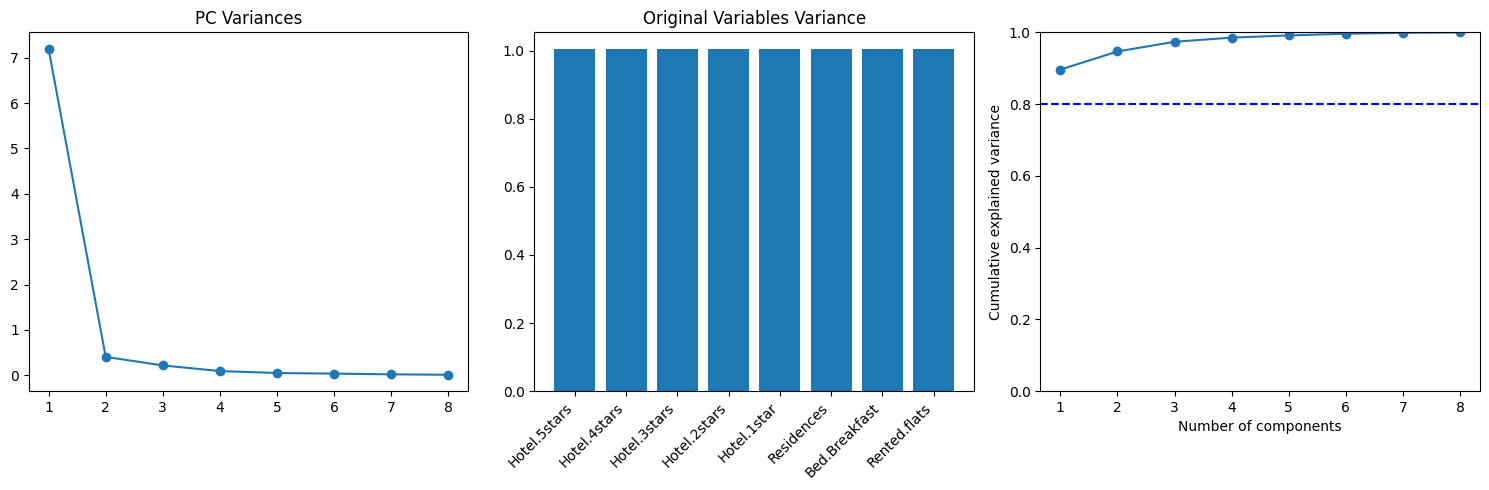

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(np.arange(1, p_tour+1), pca_tourists_std.explained_variance_, marker='o')
axs[0].set_title('PC Variances')
orig_variances = tourists_std_df.var(ddof=1)
axs[1].bar(tourists_data.columns, orig_variances)
axs[1].tick_params(axis='x', rotation=45)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_title('Original Variables Variance')
cum_explained = np.cumsum(pca_tourists_std.explained_variance_ratio_)
axs[2].plot(np.arange(1, p_tour+1), cum_explained, marker='o')
axs[2].axhline(1, color='blue')
axs[2].axhline(0.8, color='blue', linestyle='--')
axs[2].set_xlabel('Number of components')
axs[2].set_ylabel('Cumulative explained variance')
axs[2].set_ylim(0,1)
plt.tight_layout()
plt.show()

If we wanted to perform dimensionality reduction, we could keep 1 or 2 PCs

Loadings

In [28]:
load_tour_std = pca_tourists_std.components_.T
load_tour_std

array([[ 0.34094343,  0.59123382,  0.19309851, -0.26881534, -0.14749888,
         0.40169545, -0.32438137, -0.36920591],
       [ 0.36303235,  0.30520188, -0.0638927 , -0.27124653, -0.16271971,
        -0.00646527,  0.34510892,  0.74282077],
       [ 0.36824629, -0.0754591 , -0.20740553, -0.15913374,  0.07951614,
        -0.10460492,  0.69912569, -0.53321503],
       [ 0.3519069 , -0.42808893, -0.07764867, -0.50223959, -0.22697655,
        -0.43716996, -0.43661624, -0.03684846],
       [ 0.34676276, -0.52252462, -0.17281238,  0.07582116,  0.15164369,
         0.72368312, -0.07946065,  0.13447521],
       [ 0.35803476,  0.25373557, -0.30791029,  0.23674428,  0.70801281,
        -0.27644559, -0.27417451,  0.06080133],
       [ 0.33792625, -0.17132443,  0.86887665,  0.1935478 ,  0.18520528,
        -0.13472994,  0.09804763,  0.04449633],
       [ 0.36040788,  0.03967862, -0.17310351,  0.69089654, -0.57909089,
        -0.13508378, -0.07188258, -0.04967821]])

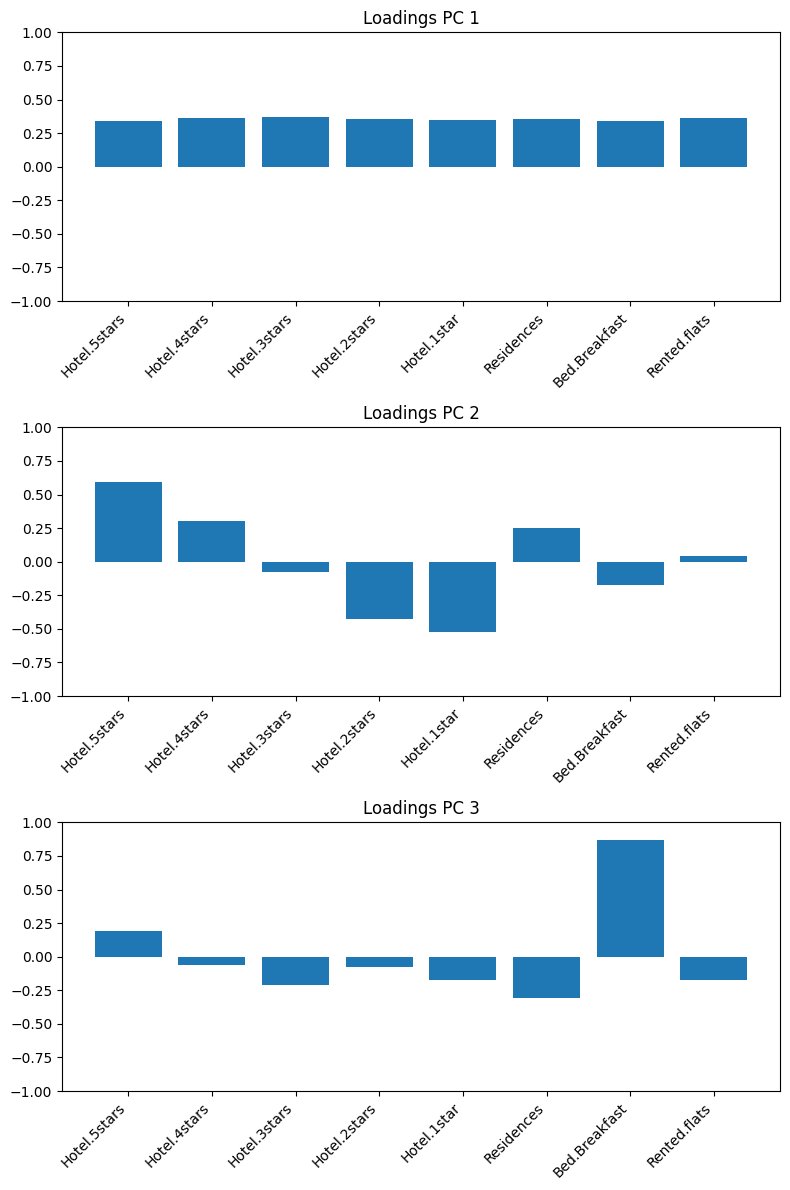

In [29]:
# Barplots of loadings for the first three PCs
fig, axs = plt.subplots(3, 1, figsize=(8,12))
for i in range(3):
    axs[i].bar(tourists_std_df.columns, load_tour_std[:, i])
    axs[i].set_ylim([-1, 1])
    axs[i].set_title(f'Loadings PC {i+1}')
    axs[i].tick_params(axis='x', rotation=45)
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation of the loadings:

TODO

## Interpretations with categorical variables

Project the data applying PCA

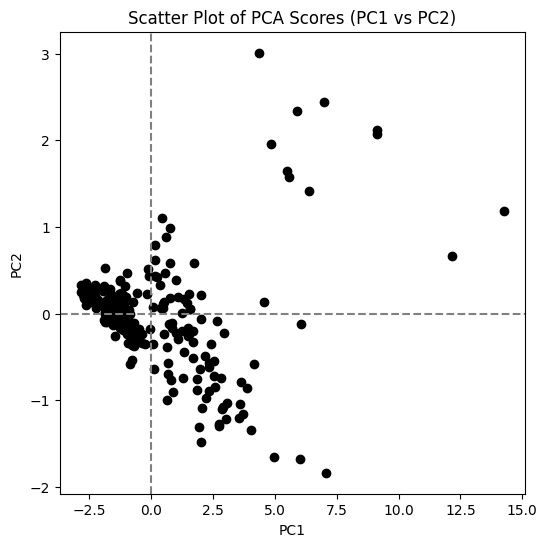

In [30]:
scores_tourists = pca_tourists_std.transform(tourists_std_df)
n = scores_tourists.shape[0]

# Scatter plot of the scores for the first two PCs
plt.figure(figsize=(6,6))
plt.scatter(scores_tourists[:, 0], scores_tourists[:, 1], color='black', marker='o')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of PCA Scores (PC1 vs PC2)")
plt.show()

Analysis by month

In [31]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Convert the first column to an ordered categorical variable.
tourists_label['Month'] = pd.Categorical(tourists_label.iloc[:, 0],
                                           categories=months,
                                           ordered=True)

# Define a cyclic palette (list of hex colors) for the 12 months.
palette = ["#2D1857", "#4D2C8C", "#6C47C7", "#8B63FF", "#7A8CDD", "#68B5C5",
           "#5ECABA", "#46AF89", "#108963", "#047138", "#025A26", "#013814"]

# Map each month to a color.
month_to_color = {m: c for m, c in zip(months, palette)}
col_lab1 = tourists_label['Month'].map(month_to_color)


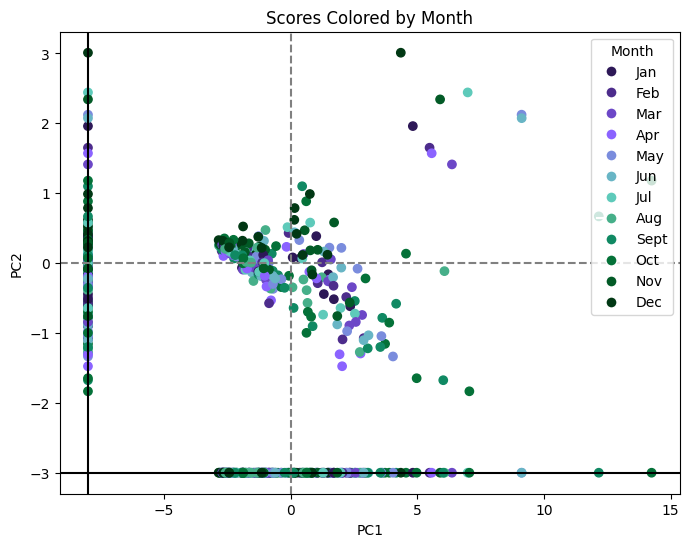

In [ ]:
# Scatter plot of scores colored by month.
plt.figure(figsize=(8,6))
plt.scatter(scores_tourists[:, 0], scores_tourists[:, 1], c=col_lab1, marker='o')
plt.axhline(-3, color='black')
plt.axvline(-8, color='black')
# Additional points along the margins
plt.scatter(scores_tourists[:, 0], np.full(n, -3), c=col_lab1, marker='o')
plt.scatter(np.full(n, -8), scores_tourists[:, 1], c=col_lab1, marker='o')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("Scores Colored by Month")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=month_to_color[m],
                               markersize=8, label=m) for m in months]
plt.legend(handles=legend_handles, title="Month", loc='upper right')
plt.show()

Analysis for month of Expo (May to Oct)

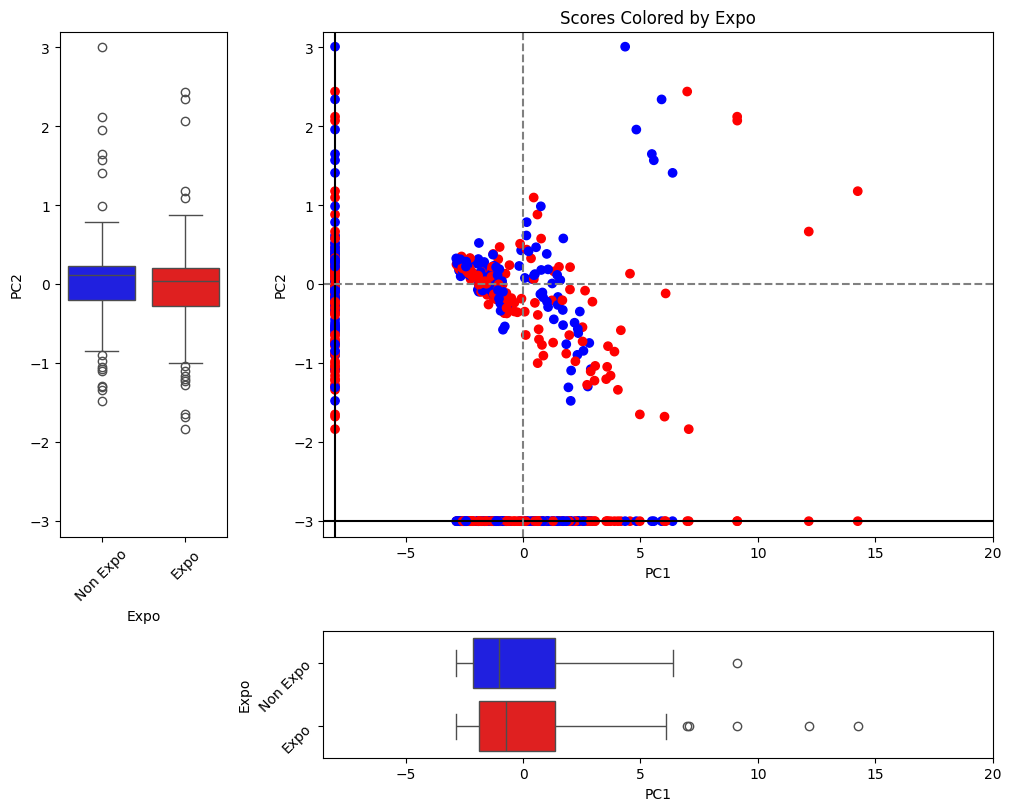

In [32]:
expo_months = ["May", "Jun", "Jul", "Aug", "Sept", "Oct"]

# Create a new column 'Expo' that is 'Expo' if the month is in expo_months, otherwise 'Non Expo'
tourists_label['Expo'] = tourists_label['Month'].apply(lambda m: 'Expo' if m in expo_months else 'Non Expo')

# Define colors for Expo groups.
col_expo = tourists_label['Expo'].map({'Expo': 'red', 'Non Expo': 'blue'})

# Create a layout with a scatter plot and two boxplots.
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(10,8))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 4], height_ratios=[4, 1])

ax_scatter = fig.add_subplot(gs[0, 1])
ax_box_y = fig.add_subplot(gs[0, 0], sharey=ax_scatter)
ax_box_x = fig.add_subplot(gs[1, 1], sharex=ax_scatter)

# Scatter plot with expo colors.
ax_scatter.scatter(scores_tourists[:, 0], scores_tourists[:, 1], c=col_expo, marker='o')
ax_scatter.set_xlim(-8.5, 20)
ax_scatter.set_ylim(-3.2, 3.2)
ax_scatter.axhline(-3, color='black')
ax_scatter.axvline(-8, color='black')
ax_scatter.scatter(scores_tourists[:, 0], np.full(n, -3), c=col_expo, marker='o')
ax_scatter.scatter(np.full(n, -8), scores_tourists[:, 1], c=col_expo, marker='o')
ax_scatter.axhline(0, linestyle='--', color='grey')
ax_scatter.axvline(0, linestyle='--', color='grey')
ax_scatter.set_xlabel("PC1")
ax_scatter.set_ylabel("PC2")
ax_scatter.set_title("Scores Colored by Expo")

# Prepare a DataFrame for boxplots.
scores_df = pd.DataFrame(scores_tourists[:,:2], columns=["PC1", "PC2"])
scores_df['Expo'] = tourists_label['Expo']

# Boxplot for PC2 grouped by Expo (vertical boxplot)
sns.boxplot(x='Expo', y='PC2', data=scores_df, ax=ax_box_y,
            palette={'Expo': 'red', 'Non Expo': 'blue'})
ax_box_y.set_ylim(-3.2, 3.2)
ax_box_y.tick_params(axis='x', rotation=45)

# Boxplot for PC1 grouped by Expo (horizontal boxplot)
sns.boxplot(x='PC1', y='Expo', data=scores_df, ax=ax_box_x,
            palette={'Expo': 'red', 'Non Expo': 'blue'}, orient='h')
ax_box_x.set_xlim(-8.5, 20)
ax_box_x.tick_params(axis='y', rotation=45)

plt.show()


Scores Colored by Region of Origin

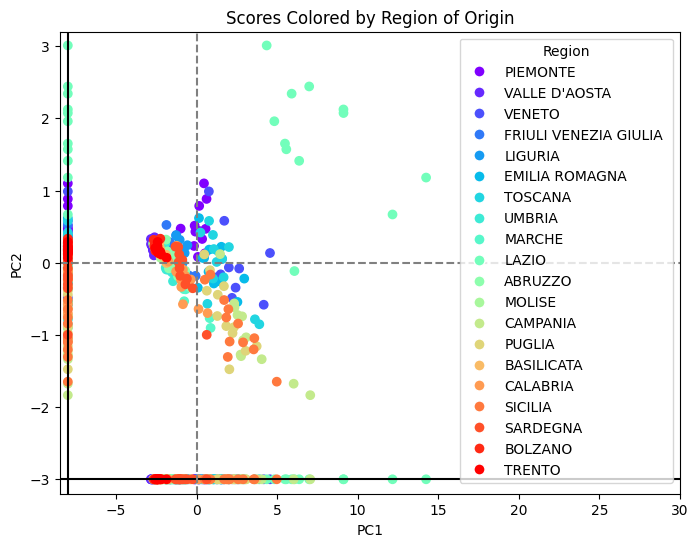

In [33]:
regions = tourists_label['Region.of.origin'].unique()
# Create a color mapping using a rainbow colormap.
region_colors = {region: color for region, color in zip(regions, plt.cm.rainbow(np.linspace(0, 1, len(regions))))}
col_lab2 = tourists_label.iloc[:, 1].map(region_colors)

plt.figure(figsize=(8,6))
plt.scatter(scores_tourists[:, 0], scores_tourists[:, 1], c=col_lab2, marker='o')
plt.xlim(-8.5, 30)
plt.ylim(-3.2, 3.2)
plt.axhline(-3, color='black')
plt.axvline(-8, color='black')
plt.scatter(scores_tourists[:, 0], np.full(n, -3), c=col_lab2, marker='o')
plt.scatter(np.full(n, -8), scores_tourists[:, 1], c=col_lab2, marker='o')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scores Colored by Region of Origin")
# Create legend for regions.
legend_handles_regions = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=region_colors[r],
                                     markersize=8, label=r) for r in regions]
plt.legend(handles=legend_handles_regions, title="Region", loc='upper right')
plt.show()

# PCA on the Food Dataset

## Load and visualize dataset

In [35]:
food = pd.read_csv('../DatasetsLabs/Food.txt', sep=' ')
print(food.head())
print('Food dataset shape:', food.shape)

                Meat  Pigs  Eggs  Milk  Fish  Cereals  Pulse  Fruit
Albania         10.1   1.4   0.5   8.9   0.2     42.3    5.5    1.7
Austria          8.9  14.0   4.3  19.9   2.1     28.0    1.3    4.3
Belg.Lux.       13.5   9.3   4.1  17.5   4.5     26.6    2.1    4.0
Bulgaria         7.8   6.0   1.6   8.3   1.2     56.7    3.7    4.2
Czechoslovakia   9.7  11.4   2.8  12.5   2.0     34.3    1.1    4.0
Food dataset shape: (25, 8)


In [36]:
food.sum(axis=1)

Albania           70.6
Austria           82.8
Belg.Lux.         81.6
Bulgaria          89.5
Czechoslovakia    77.8
Denmark           85.0
East.Germany      69.2
Finland           85.3
France            93.4
Greece            95.5
Hungary           80.3
Ireland           85.1
Italy             81.9
Netherlands       80.5
Norway            77.2
Poland            86.8
Portugal          72.7
Romania           83.8
Spain             71.5
Sweden            76.3
Switzerland       85.3
United.Kingdom    83.7
USSR              85.5
West.Germany      74.1
Yugoslavia        85.5
dtype: float64

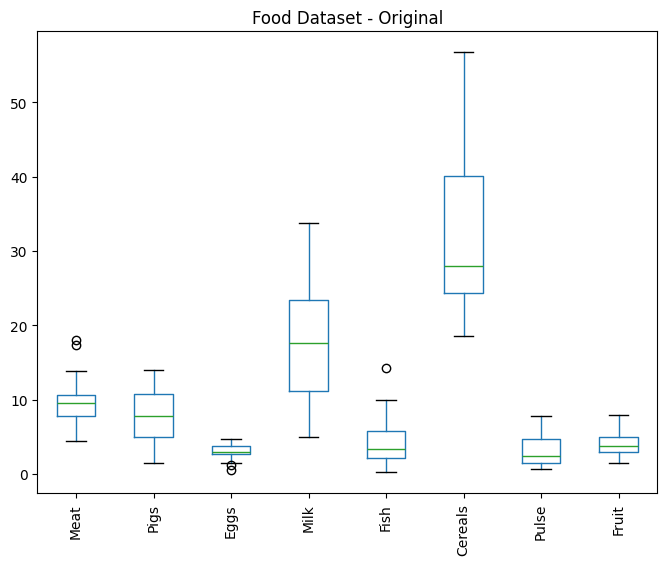

In [38]:
n_food, p_food = food.shape

food.boxplot(rot=90, grid=False)
plt.title('Food Dataset - Original')
plt.show()

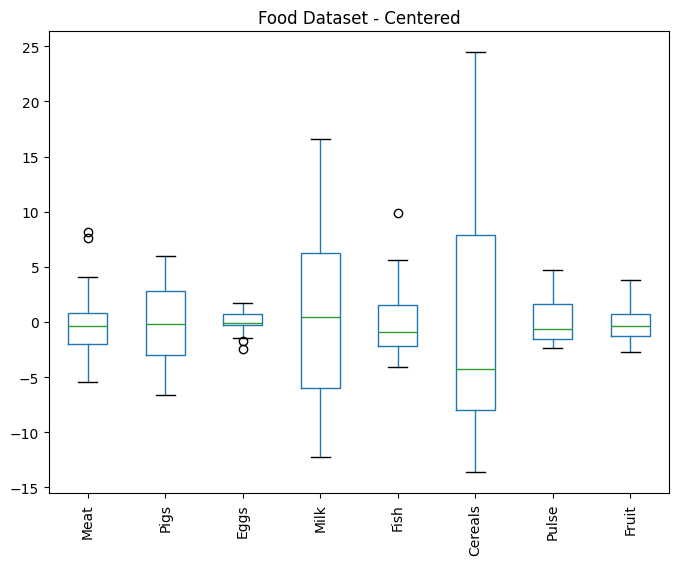

In [39]:
food_centered = food - food.mean()
plt.figure()
food_centered.boxplot(rot=90, grid=False)
plt.title('Food Dataset - Centered')
plt.show()

## PCA on standardized data

In [40]:
# Standardize the food data
scaler_food = StandardScaler()
food_std = scaler_food.fit_transform(food)
food_std_df = pd.DataFrame(food_std, columns=food.columns)
print(food_std_df.head())

       Meat      Pigs      Eggs      Milk      Fish   Cereals     Pulse  \
0  0.082941 -1.867718 -2.289993 -1.179538 -1.225033  0.934804  1.247968   
1 -0.282974  1.697926  1.258936  0.399688 -0.655111 -0.395051 -0.910790   
2  1.119699  0.367884  1.072150  0.055129  0.064791 -0.525246 -0.499598   
3 -0.618396 -0.565975 -1.262672 -1.265678 -0.925074  2.273959  0.322786   
4 -0.039031  0.962158 -0.141957 -0.662700 -0.685107  0.190830 -1.013588   

      Fruit  
0 -1.378251  
1  0.092789  
2 -0.076947  
3  0.036210  
4 -0.076947  


In [41]:
pca_food = PCA()
food_scores = pca_food.fit_transform(food_std_df)
print('Food PCA explained variance ratio:\n', pca_food.explained_variance_ratio_)

Food PCA explained variance ratio:
 [0.46323022 0.18218656 0.14032046 0.10846036 0.04107323 0.03496567
 0.01585753 0.01390598]


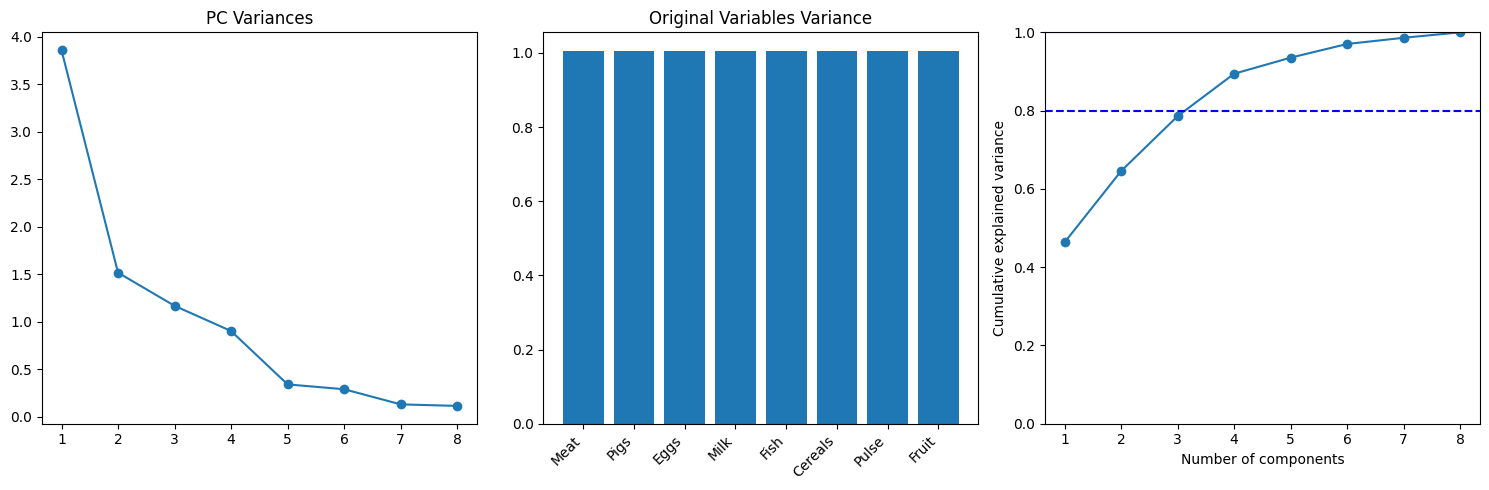

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(np.arange(1, p_food+1), pca_food.explained_variance_, marker='o')
axs[0].set_title('PC Variances')
orig_variances = food_std.var(ddof=1)
axs[1].bar(food_std_df.columns, orig_variances)
axs[1].tick_params(axis='x', rotation=45)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_title('Original Variables Variance')
cum_explained = np.cumsum(pca_food.explained_variance_ratio_)
axs[2].plot(np.arange(1, p_food+1), cum_explained, marker='o')
axs[2].axhline(1, color='blue')
axs[2].axhline(0.8, color='blue', linestyle='--')
axs[2].set_xlabel('Number of components')
axs[2].set_ylabel('Cumulative explained variance')
axs[2].set_ylim(0,1)
plt.tight_layout()
plt.show()

In [43]:
scores_food_df = pd.DataFrame(food_scores)

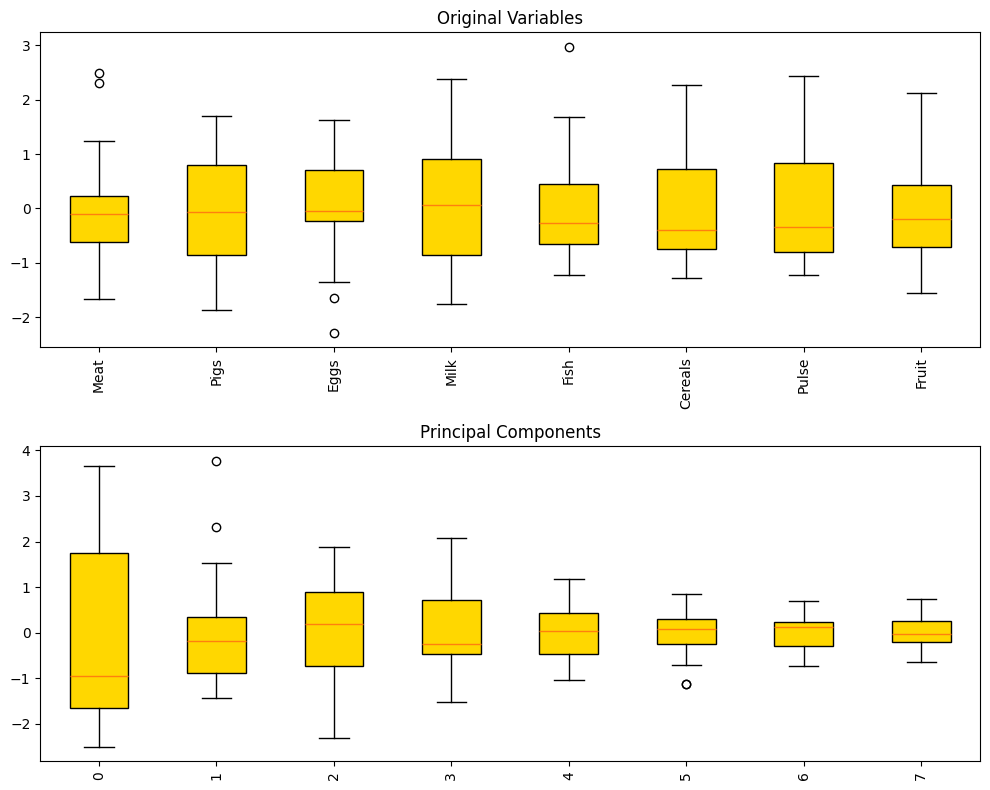

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Boxplot for the original variables
bp1 = axs[0].boxplot(food_std_df.values, patch_artist=True)
# Set x-tick labels using the DataFrame's column names and rotate them 90° (or 45° if desired)
axs[0].set_xticklabels(food_std_df.columns, rotation=90)  # change rotation=45 if you prefer
axs[0].set_title('Original Variables')
# Color each box gold
for box in bp1['boxes']:
    box.set_facecolor('gold')

# Boxplot for the PCA scores (principal components)
bp2 = axs[1].boxplot(scores_food_df.values, patch_artist=True)
axs[1].set_xticklabels(scores_food_df.columns, rotation=90)  # or rotation=45 as needed
axs[1].set_title('Principal Components')
for box in bp2['boxes']:
    box.set_facecolor('gold')

plt.tight_layout()
plt.show()

Loadings

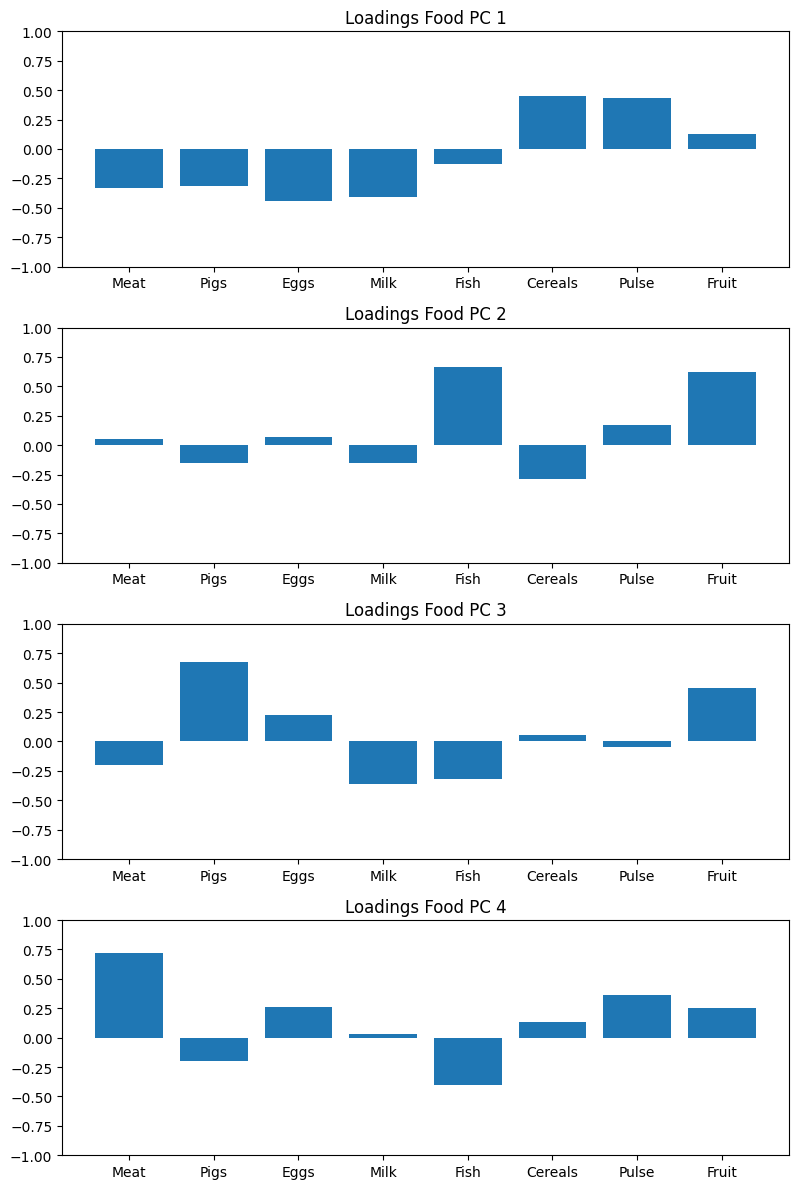

In [45]:
load_food = pca_food.components_.T
fig, axs = plt.subplots(4, 1, figsize=(8,12))
for i in range(4):
    axs[i].bar(food_std_df.columns, load_food[:, i])
    axs[i].set_ylim([-1, 1])
    axs[i].set_title(f'Loadings Food PC {i+1}')
plt.tight_layout()
plt.show()

Let's plot only the most significant loadings

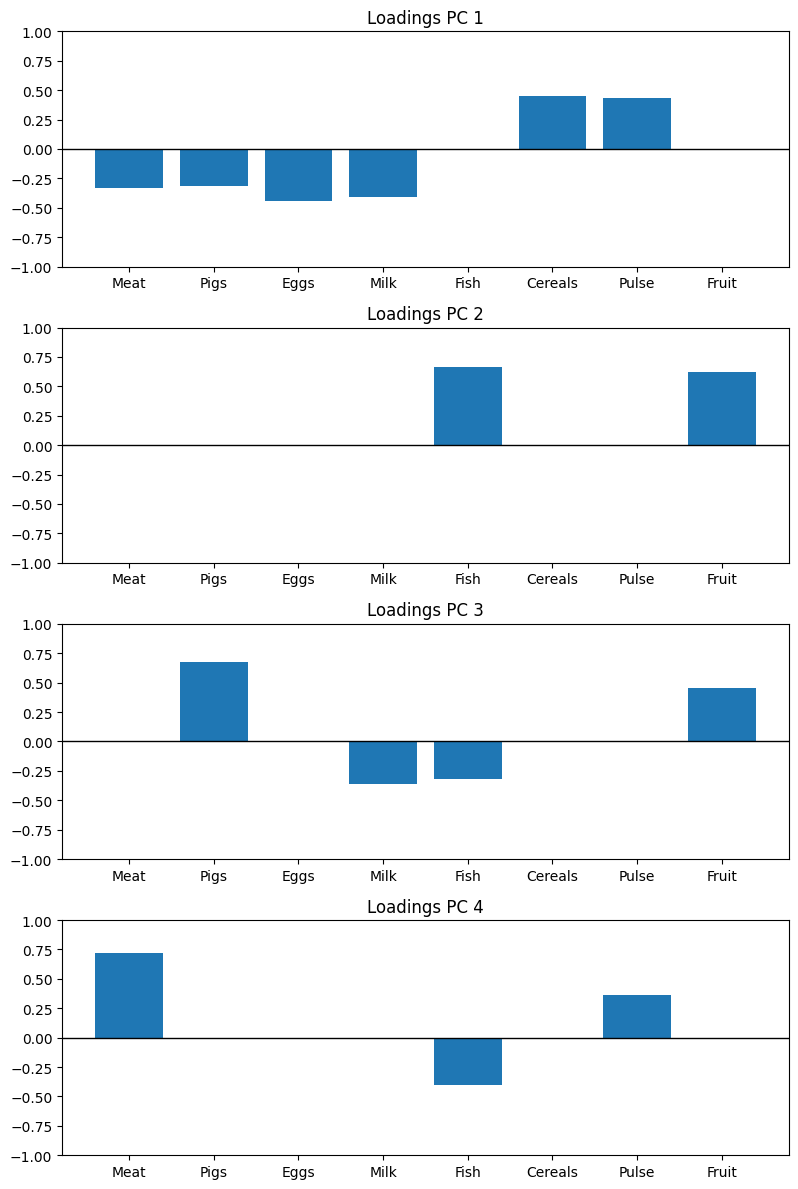

In [46]:
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
for i in range(4):
    # Replace values with 0 if |value| < 0.3
    significant_loadings = np.where(np.abs(load_food[:, i]) < 0.3, 0, load_food[:, i])
    axs[i].bar(food_std_df.columns, significant_loadings)
    axs[i].set_ylim([-1, 1])
    axs[i].axhline(0, color='black', linewidth=1)
    axs[i].set_title(f'Loadings PC {i+1}')
plt.tight_layout()
plt.show()


Let's have a look at how well we can reconstruct the original data with an increasing number of components

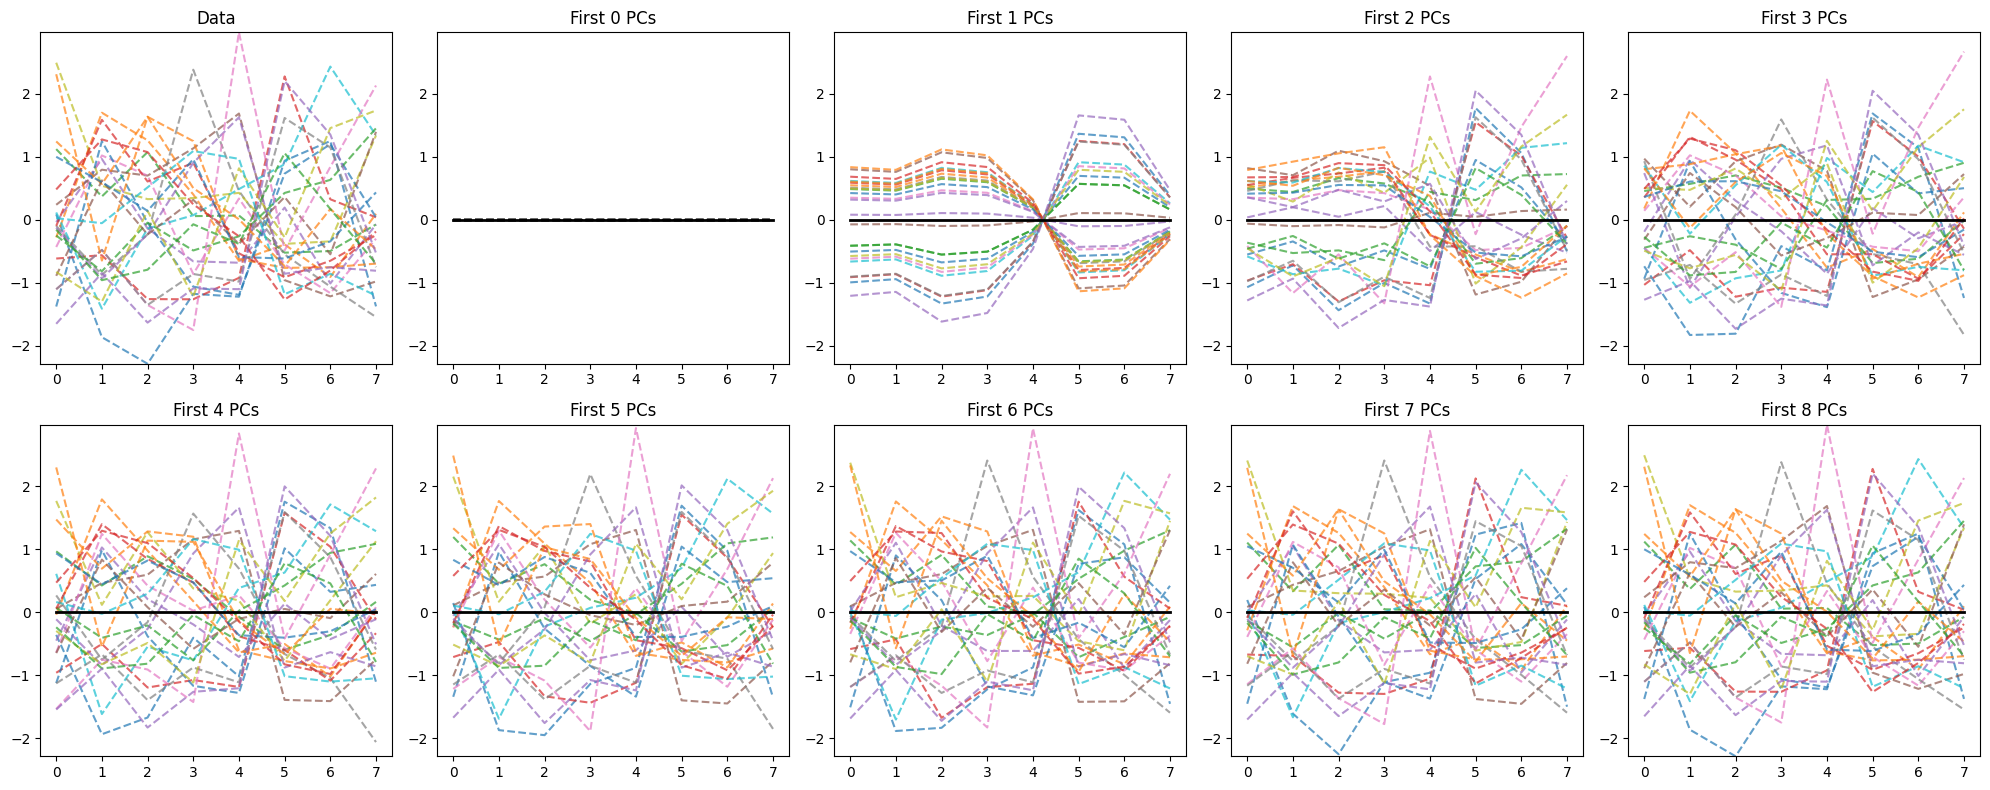

In [47]:
import numpy as np
import matplotlib.pyplot as plt

n_obs, n_vars = food_std_df.shape
x = np.arange(n_vars)  # x-axis: one value for each variable (or use food_sd.columns if preferred)

# Create a figure with 2 rows and 5 columns (10 subplots total)
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()  # Flatten for easy iteration

# --- Plot the Original Data ---
# Each observation (each row of food_sd) is plotted as a line.
for i in range(n_obs):
    axs[0].plot(x, food_std_df.iloc[i, :], '--', alpha=0.7)
axs[0].set_title("Data")
axs[0].set_ylim(food_std_df.values.min(), food_std_df.values.max())

# --- Plot the "First 0 PCs" Approximation ---
# Compute the mean vector (i.e. the column means) of food_sd.
meanF = food_std_df.mean(axis=0).values

# Create an initial projection matrix that is just the mean for every observation.
projection = np.tile(meanF, (n_obs, 1))
for i in range(n_obs):
    axs[1].plot(x, projection[i, :], '--', color='black', alpha=0.7)
# Overlay the overall mean as a thick black line.
axs[1].plot(x, meanF, 'k-', linewidth=2)
axs[1].set_title("First 0 PCs")
axs[1].set_ylim(food_std_df.values.min(), food_std_df.values.max())

# --- Iteratively Add the Contributions of the First k PCs ---
# For each component from 1 to 8 (or fewer if there are not 8 PCs),
# update the projection by adding the outer product of the PC scores and its loading.
num_components = min(8, scores_food_df.shape[1])
for comp in range(num_components):
    # Update: for the comp-th PC, add (score for that PC) * (loading vector for that PC)
    # This yields an (n_obs x n_vars) matrix.
    projection = projection + np.outer(scores_food_df.iloc[:, comp], load_food[:, comp])

    # Plot the updated projection in subplot comp+2 (since index 0 is original data, index 1 is 0 PCs).
    ax = axs[comp + 2]
    # Plot one line per observation (i.e. each row of projection)
    for i in range(n_obs):
        ax.plot(x, projection[i, :], '--', alpha=0.7)
    # Optionally overlay the mean for reference.
    ax.plot(x, meanF, 'k-', linewidth=2)
    ax.set_title(f"First {comp+1} PCs")
    ax.set_ylim(food_std_df.values.min(), food_std_df.values.max())

plt.tight_layout()
plt.show()


In the first plot each line corresponds to an observation of the original dataset

In the second plot there are no principal components: each observation is represented by the mean, which is zero for all since they were standardized

From the third plot on we progressively add more principal components